In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from interstellar import *
import warnings
from scipy.optimize import curve_fit
from scipy.stats import vonmises

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


task_colors = {'perception': 'teal', 'wm': 'green', 'ltm': 'orange'}


warnings.filterwarnings('ignore')
wlsubjects = [114, 115, 127, 135, 136, 139, 141, 142]
rois = ["V1", "V2", "V3", "V4", "LO1", "V3ab", "IPS0"]

# Set path to dataframe directory
df_dir = "../data/dataframes/"

fname = os.path.join(df_dir, 'sub-all_saccades.tsv')
Saccades = pd.read_csv(fname, sep = '\t', index_col = 0)
tasks = ['perception', 'wm', 'ltm']


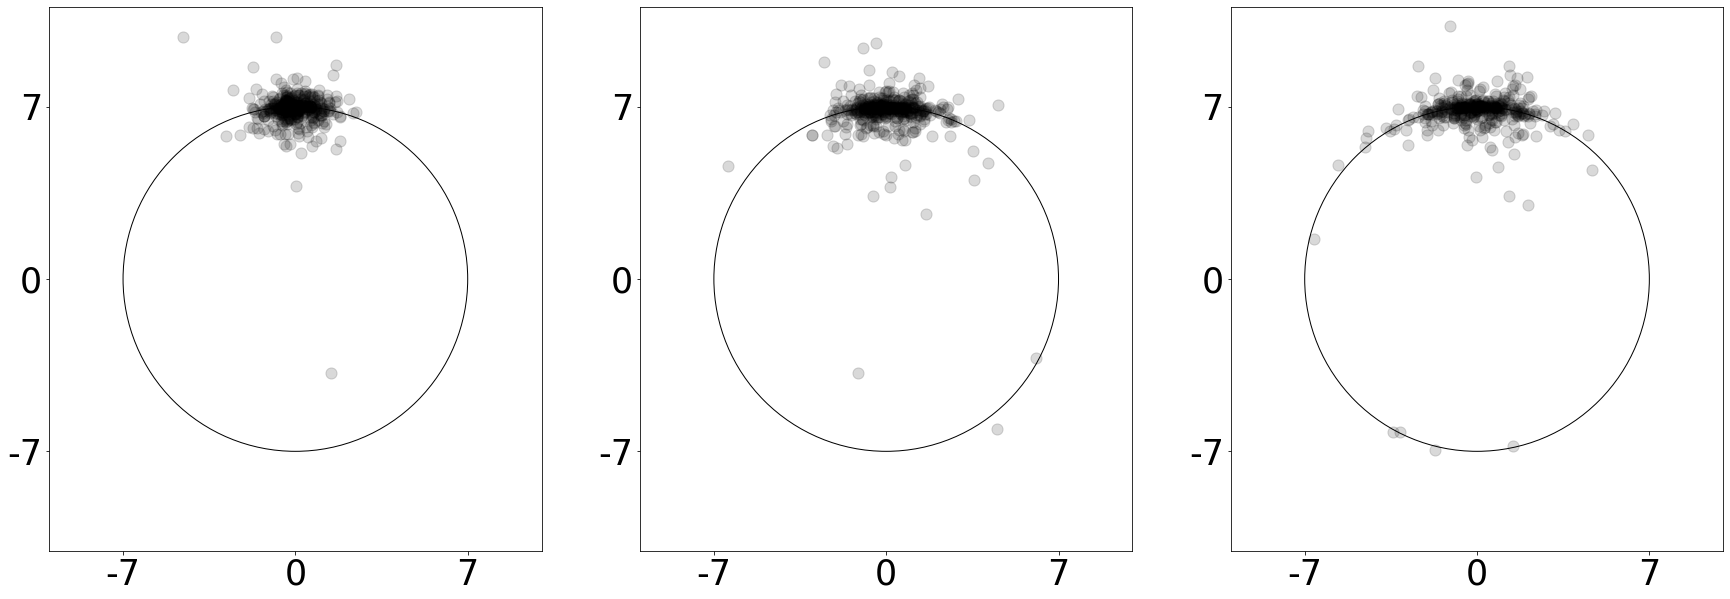

In [53]:
query_str = "task==@task & sacc_label=='response' & wlsubj != 139"

fig,axs = plt.subplots(1, 3, figsize = [30, 10])
colors = {
    'perception':'teal',
    'ltm':'orange',
    'wm':'green'
}

sz = 35

target_ring = Circle((0, 0), radius = 7, fill = False)

for i, g in enumerate(Saccades.groupby('task', as_index=False)):
    task, s = g
    s = s.query(query_str)
    i = tasks.index(task)
    axs[i].scatter(s.x_centered, s.y_centered, c = 'black', alpha = 0.15, s = 125)

    target_ring = Circle((0, 0), radius = 7, fill = False)
    axs[i].set_yticklabels([-7, 0, 7], size = sz)
    axs[i].set_yticks([-7, 0, 7], size = sz)
    axs[i].set_xticklabels([-7, 0, 7], size = sz)
    axs[i].set_xticks([-7, 0, 7], size = sz)
    axs[i].add_patch(target_ring)

    axs[i].axis('equal')
    axs[i].set_xlim([-10, 10])
    axs[i].set_ylim([-10, 10])

In [9]:
S = Saccades.query("sacc_label=='response' & wlsubj != 139")

,wlsubj,run,task,trial_id,cond,sacc_idx,sacc_label,index,event,eye,...,sac_x_deg,sac_y_deg,sac_ang,sac_ecc,target_theta,sacc_theta,ang_dist,fix_duration,x_centered,y_centered
3,114,1,perception,0,10,3,response,73,ESACC,R,...,-4.700000,-4.845455,-134.126989,6.750439,-2.354947,-2.340958,-0.801527,171,0.094431,6.749779
6,114,1,perception,1,14,2,response,141,ESACC,R,...,6.156818,-3.372727,-28.714087,7.020093,-0.493221,-0.501155,0.454579,734,-0.055696,7.019872
8,114,1,perception,2,3,0,response,239,ESACC,R,...,2.927273,6.384091,65.367305,7.023215,1.220513,1.140875,4.562946,33,-0.558727,7.000955
16,114,1,perception,3,5,2,response,335,ESACC,R,...,-3.470455,6.170455,119.354748,7.079447,2.188968,2.083133,6.063892,375,-0.747854,7.039835
19,114,1,perception,4,8,1,response,420,ESACC,R,...,-7.038636,-0.709091,-174.247280,7.074264,-2.997238,-3.041189,2.518203,123,-0.310820,7.067433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,142,12,wm,11,37,1,response,480,ESACC,R,...,-3.843182,5.963636,122.799188,7.094717,1.997127,2.143250,-8.372243,206,1.033017,7.019108
46,142,12,wm,12,32,2,response,517,ESACC,R,...,6.527273,2.152273,18.249216,6.872959,0.223269,0.318509,-5.456824,869,0.653588,6.841812
49,142,12,wm,13,35,2,response,554,ESACC,R,...,2.947727,6.506818,65.628461,7.143373,1.263380,1.145433,6.757909,158,-0.840593,7.093743
52,142,12,wm,14,39,1,response,588,ESACC,R,...,-6.011364,1.690909,164.289480,6.244651,2.951179,2.867392,4.800632,1033,-0.522608,6.222744


20.633749435994233


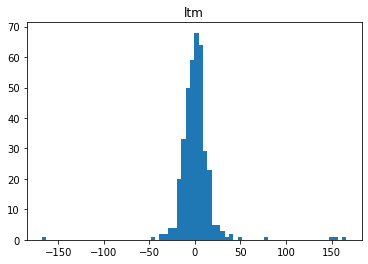

10.353798797692818


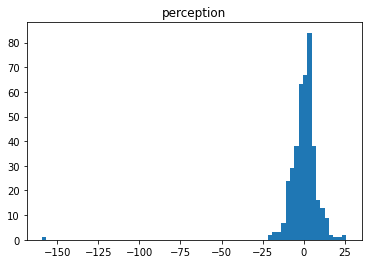

16.063057183485927


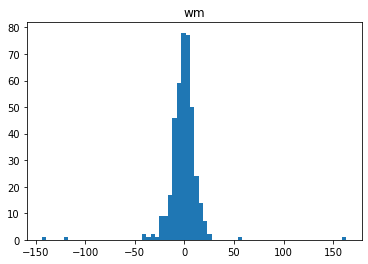

In [54]:

for i, g in S.groupby("task"):
    g = g.query("sac_ecc <= 12")
    plt.hist(fix_deg(np.degrees(np.arctan2(g.y_centered, g.x_centered)) - 90), 70)
    plt.title(i)
    print(fix_deg(np.degrees(np.arctan2(g.y_centered, g.x_centered)) - 90).std())
    plt.show()

In [51]:
degs = fix_deg(np.degrees(np.arctan2(g.y_centered, g.x_centered)) - 90)
